In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Step 1: Import the boston house dataset from sklearn.datasets

In [5]:
# from sklearn.datasets import load_boston
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# boston = load_boston()
california = fetch_california_housing()


In [ ]:
# Create train and test datasets.

In [6]:
df = pd.DataFrame(california.data, columns=california.feature_names)
df['PRICE'] = california.target

# Split the data into training and testing sets
X = df.drop('PRICE', axis=1)
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [7]:
# Check the data description and familiarize yourself with the data.

In [13]:
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
5304,14.2867,49.0,7.603774,0.946541,850.0,2.672956,34.07,-118.46,5.00001
67,2.6094,52.0,6.986395,1.659864,492.0,3.346939,37.80,-122.29,0.81300
8805,15.0001,34.0,8.783019,1.059748,1871.0,2.941824,33.76,-118.34,5.00001
11975,4.5660,18.0,7.236324,1.196937,1738.0,3.803063,33.99,-117.43,1.16900
6408,4.9583,33.0,6.551532,1.038997,995.0,2.771588,34.13,-118.03,4.45700
10650,5.0907,21.0,6.239971,1.106017,3173.0,2.272923,33.54,-117.75,3.78200
2567,2.1135,46.0,5.622921,1.103512,1206.0,2.229205,40.79,-124.16,0.90600
657,3.4583,43.0,5.599265,1.023897,1333.0,2.450368,37.70,-122.13,1.83700
14721,5.8683,26.0,7.172862,0.953532,1469.0,2.730483,32.79,-117.03,2.20500
15091,2.0685,19.0,3.989316,1.149573,1219.0,2.604701,32.80,-116.93,1.30000


In [10]:
# Step 2: Create a scatter plot of each attribute with the mean house price.

In [ ]:
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title('{} vs Price'.format(column))
    plt.show()

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


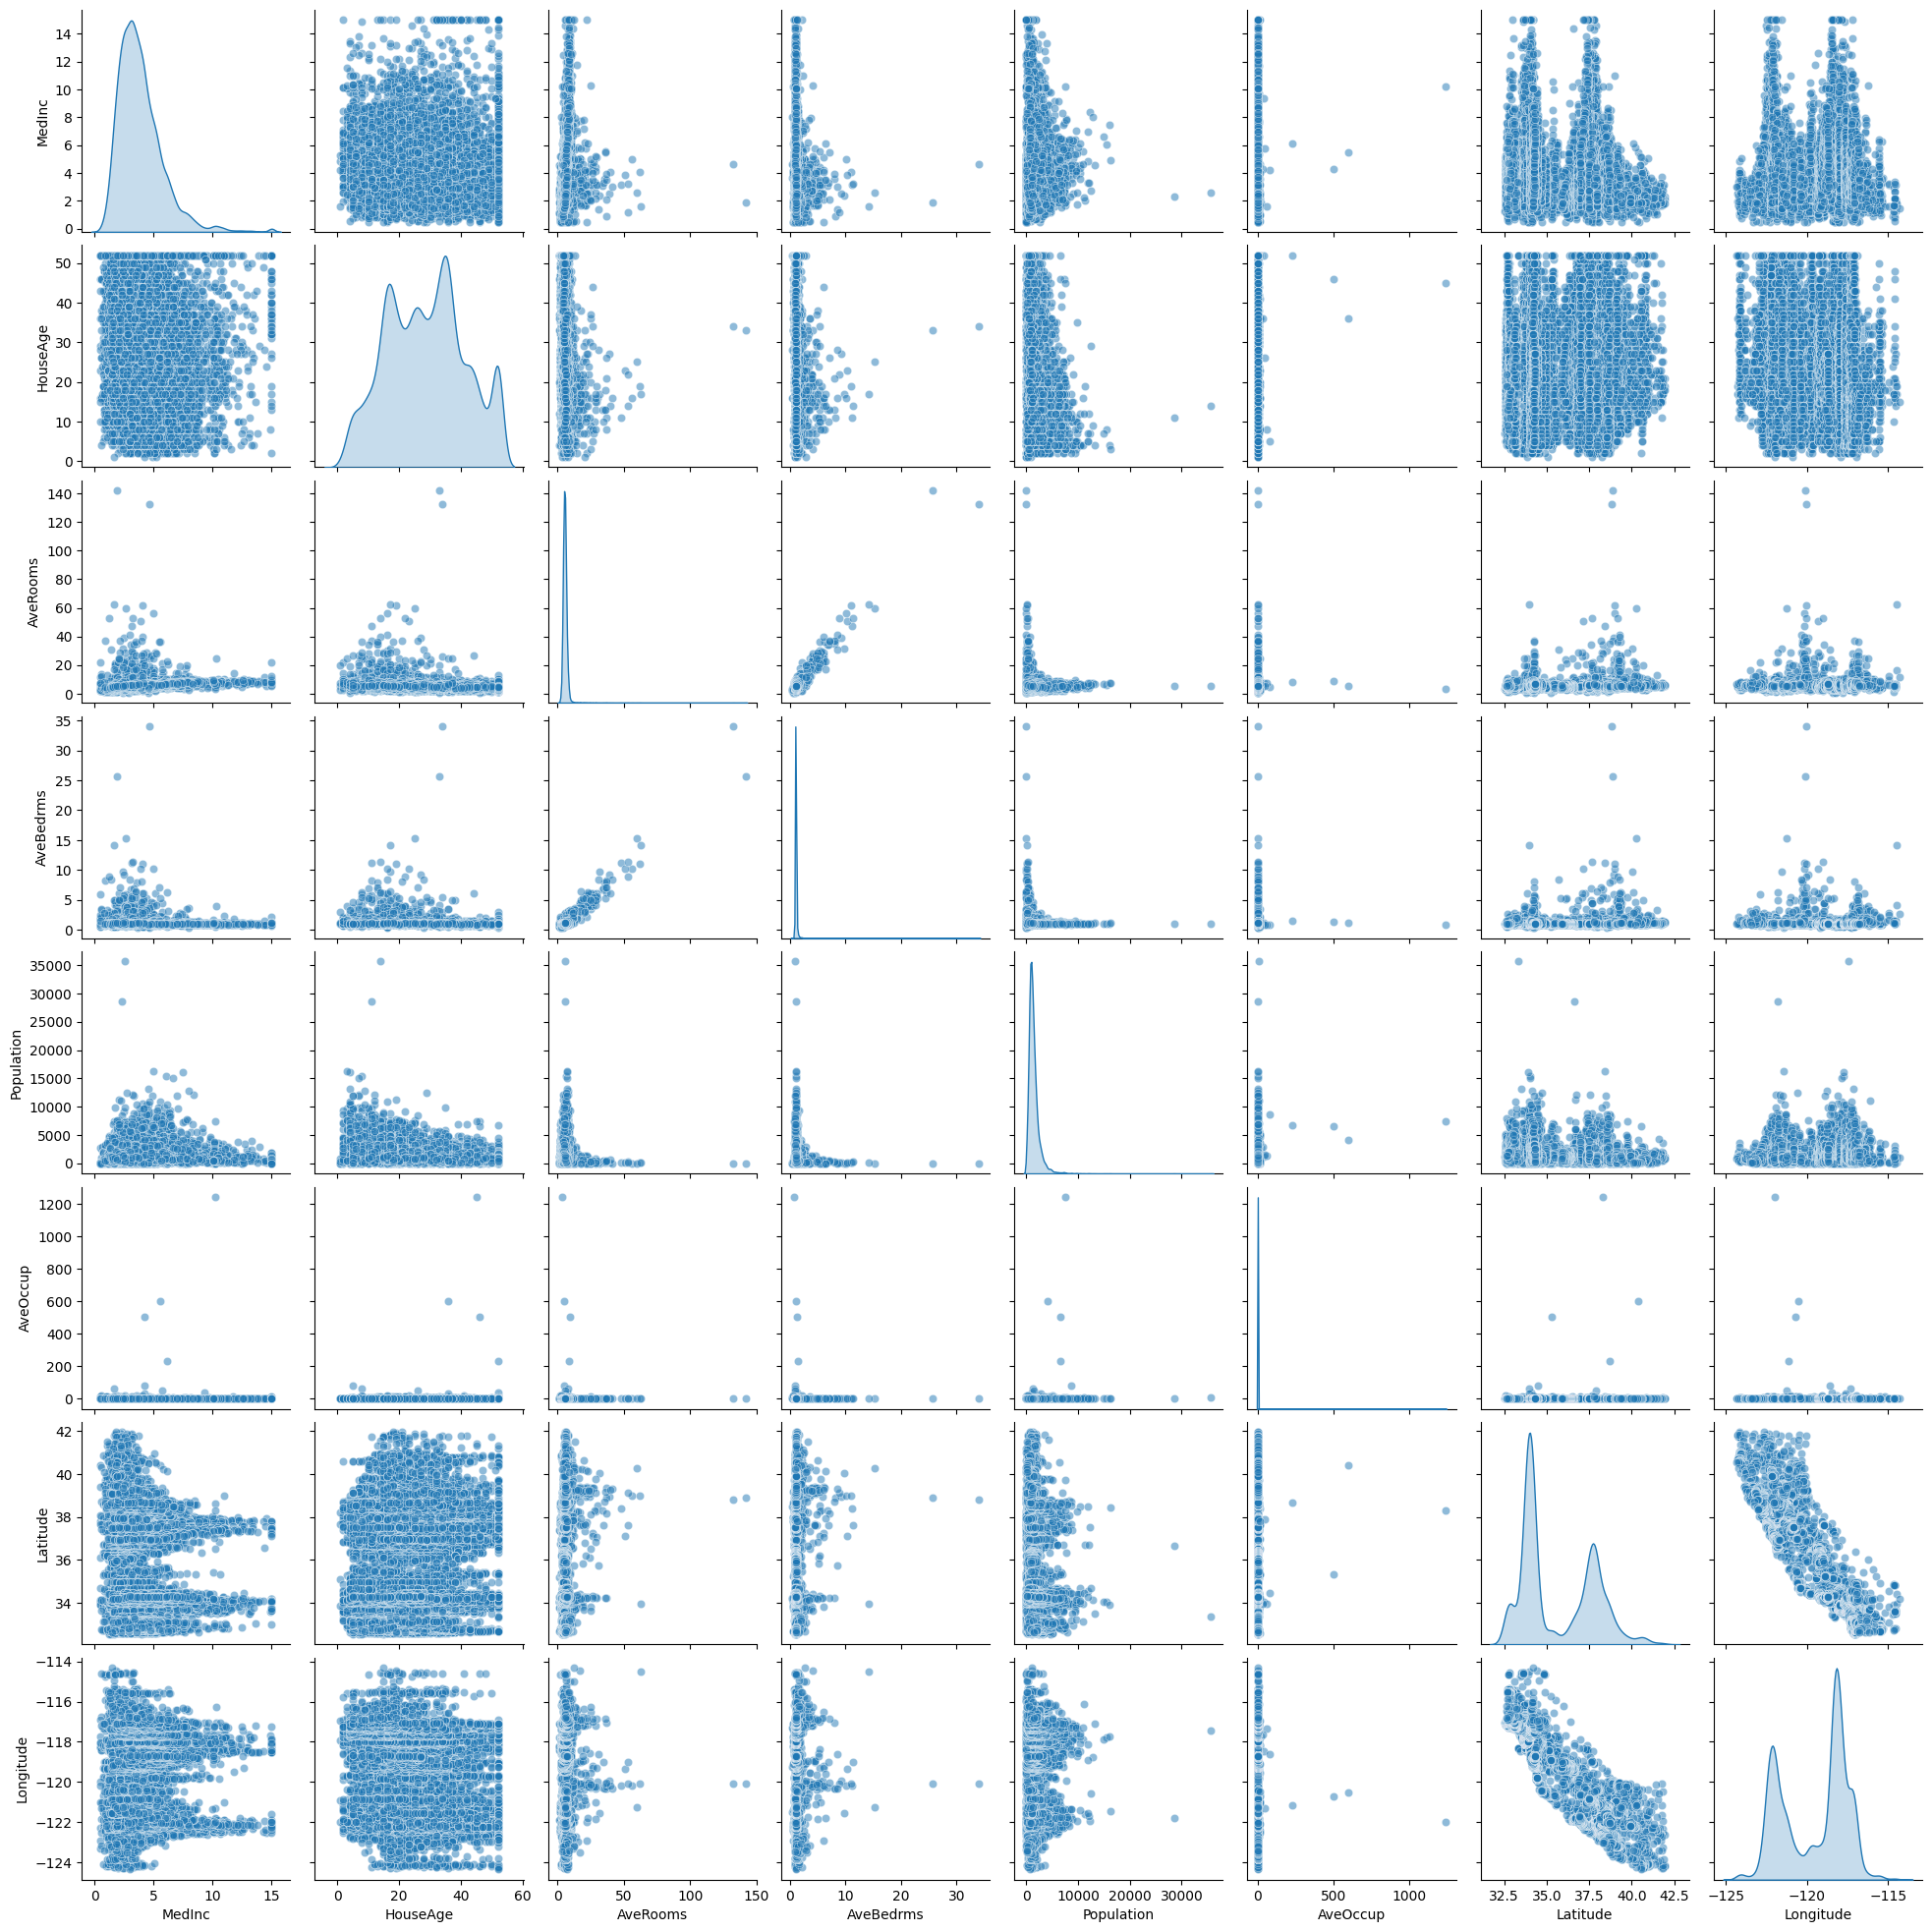

In [56]:
# !pip install seaborn
import seaborn as sns

sns.pairplot(X, diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

In [17]:
# Step 3: Create a box plot of all attributes

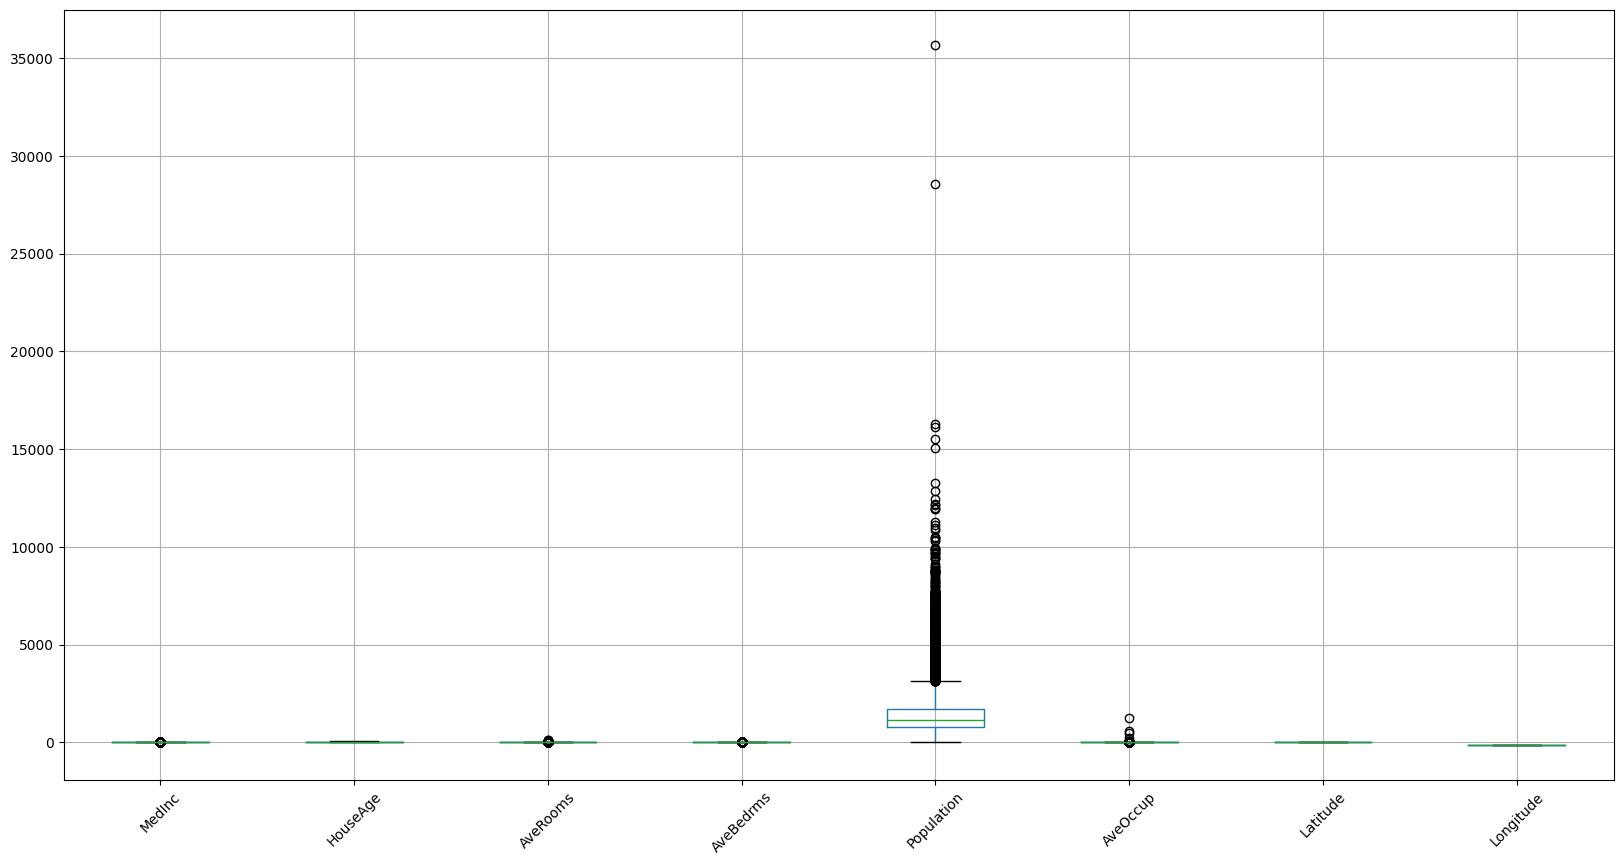

In [57]:
plt.figure(figsize=(20, 10))
X.boxplot()
plt.xticks(rotation=45)
plt.show()

In [58]:
# Step 4: Use StandardScaler() to scale the training data set.

C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\hskay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


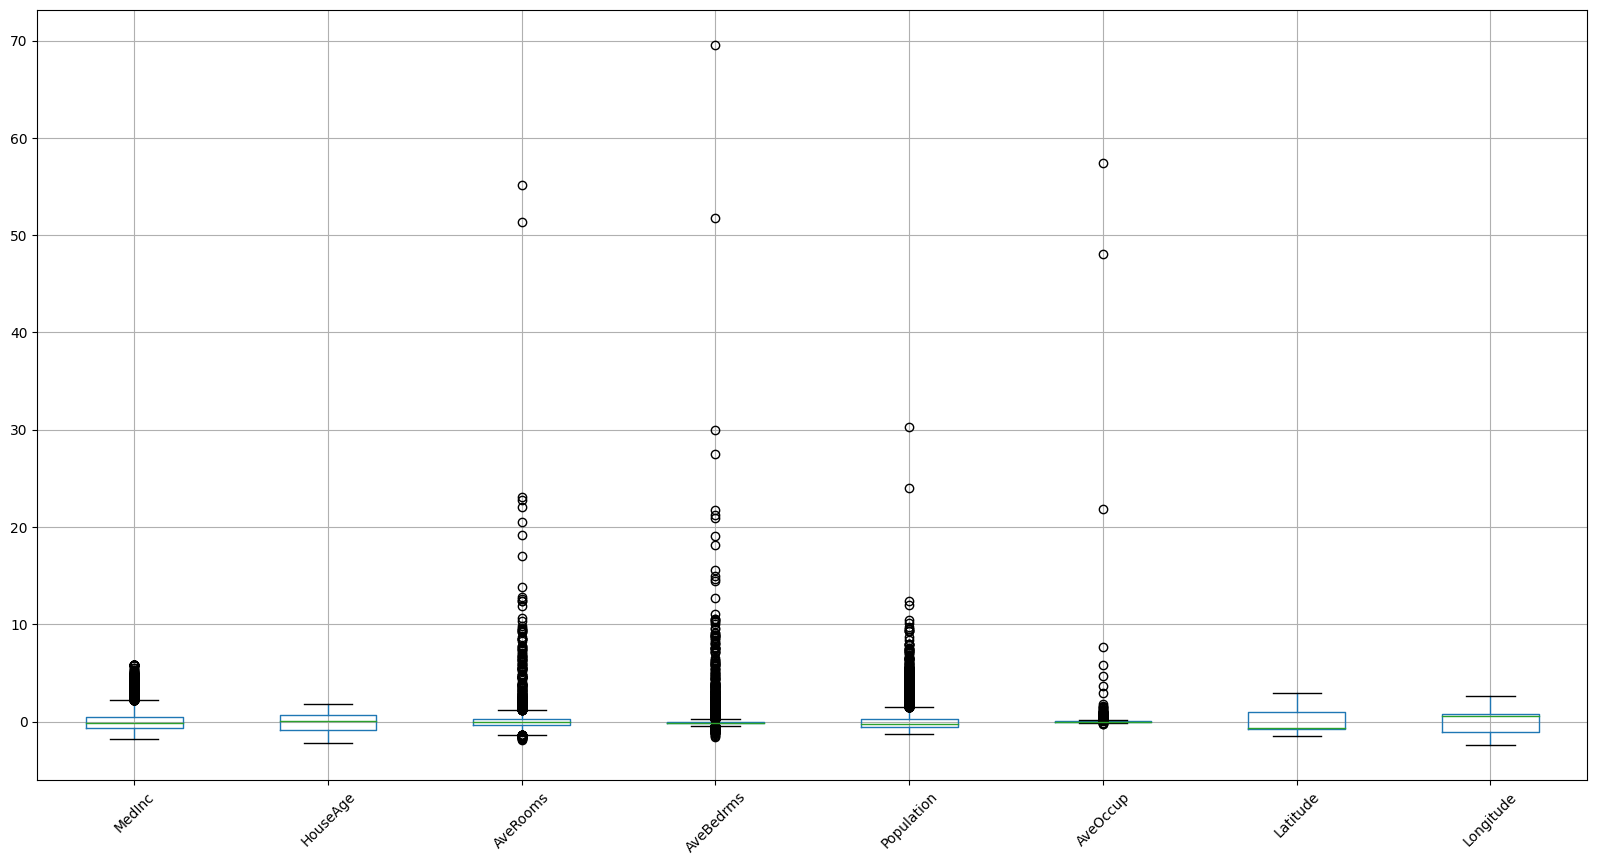

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xs = np.concatenate((X_train, X_test), axis=0)

# Fit only to the training data
scaler.fit(Xs)  

# Apply the transformations to the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


df_for_plot = pd.DataFrame(X_train_scaled, columns=california.feature_names)
plt.figure(figsize=(20, 10))
df_for_plot.boxplot()
plt.xticks(rotation=45)
plt.show()

In [74]:
y_train

12069    5.00001
15925    2.70000
11162    1.96100
4904     1.18800
4683     2.25000
          ...   
13123    1.44600
19648    1.59400
9845     2.89300
10799    4.84600
2732     0.69400
Name: PRICE, Length: 16512, dtype: float64

In [75]:
# Step 5: Use KNeighborsRegressor() to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [93]:
from sklearn.neighbors import KNeighborsRegressor

# Not scaled dataset
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn.score(X_test,y_test), knn.score(X_train, y_train)

(0.14312051440566032, 0.4512565087131998)

In [94]:
# Scaled dataset
knn_scaled = KNeighborsRegressor()
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=california.feature_names)
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=california.feature_names)
knn_scaled.fit(df_X_train_scaled, y_train)
knn.score(df_X_test_scaled, y_test), knn.score(df_X_train_scaled, y_train) # Look Data

(-0.07418905332981174, -0.06616299772293055)

In [81]:
# Step 6: Repeat Step 5 for RandomForestRegressor. Use
# RandomForestRegressor(n_estimators=100, random_state=0)

In [86]:
from sklearn.ensemble import RandomForestRegressor

# Not scaled dataset
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
rf.score(X_test, y_test), rf.score(X_train, y_train)

(0.7979950876327253, 0.9727359251943148)

In [87]:
# Scaled dataset
rf_scaled = RandomForestRegressor(n_estimators=100, random_state=0)
rf_scaled.fit(df_X_train_scaled, y_train)
rf_scaled.score(df_X_test_scaled, y_test), rf_scaled.score(df_X_train_scaled, y_train)

(0.7981064852641493, 0.9727380410499143)